<a href="https://colab.research.google.com/github/JJungEEun/lotte_project/blob/jarae/%EB%B3%B4%EC%99%84_%ED%81%B4%EB%9F%AC%EC%8A%A4%ED%84%B0%EB%A7%81_2%EC%B0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#상품 군집분석을 위한 전처리

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import matplotlib.pyplot as plt

In [3]:
import pandas as pd

In [4]:
data2=pd.read_csv('/content/drive/MyDrive/lotte/LPOINT_BIG_COMP_02_PDDE.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)




---
#병합 (이 파트는 원데이터 통합한거 제출할 경우 빼도 될듯


data2(거래데이터)에 data4(상품명 데이터)를 병합합니다

In [5]:
data2.head()

,cust,rct_no,chnl_dv,cop_c,br_c,pd_c,de_dt,de_hr,buy_am,buy_ct
0,M430112881,A01000001113,1,A01,A010039,PD0290,20210101,10,15000.0,1
1,M646853852,A01000002265,1,A01,A010025,PD1369,20210101,10,79700.0,1
2,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,19000.0,1
3,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,19000.0,1
4,M430112881,A01000004946,1,A01,A010039,PD0290,20210101,10,19000.0,1


In [6]:
#모든 행이 불러와졌는지 확인
len(data2)

4381743

In [7]:
data4=pd.read_csv('/content/drive/MyDrive/lotte/LPOINT_BIG_COMP_04_PD_CLAC.csv')

In [8]:
new_df=pd.read_csv('/content/drive/MyDrive/lotte/new_df.csv')

In [9]:
data2=pd.merge(data2,new_df,on='pd_c',how='left')

In [10]:
del data2['Unnamed: 0']

In [11]:
data2.head()

,cust,rct_no,chnl_dv,cop_c,br_c,pd_c,de_dt,de_hr,buy_am,buy_ct,pd_nm,clac_hlv_nm,clac_mcls_nm,l_pd,m_pd
0,M430112881,A01000001113,1,A01,A010039,PD0290,20210101,10,15000.0,1,남성티셔츠,남성의류,남성의류상의,L0013,M0058
1,M646853852,A01000002265,1,A01,A010025,PD1369,20210101,10,79700.0,1,기타주방일회용품,주방잡화,주방일회용품,L0048,M0298
2,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,19000.0,1,남성티셔츠,남성의류,남성의류상의,L0013,M0058
3,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,19000.0,1,남성티셔츠,남성의류,남성의류상의,L0013,M0058
4,M430112881,A01000004946,1,A01,A010039,PD0290,20210101,10,19000.0,1,남성티셔츠,남성의류,남성의류상의,L0013,M0058


In [12]:
len(data2)

4381743



---



구매 횟수가 너무 많은 M057015266, M919374790의 행 제거

In [13]:
data2.cust.value_counts()[:5]

M057015266    12448
M919374790    10049
M287960590     2564
M763326819     2524
M124357021     2143
Name: cust, dtype: int64

In [14]:
df=data2[data2.cust!='M057015266']

In [15]:
df=data2[data2.cust!='M919374790']

In [16]:
len(df)

4371694



---



mroyal1~3 (로열층) 변수 추가

royal1: 구매도 많고, 평균 구매 금액도 큰 사람

royal2: 구매는 많고, 평균 구매 금액은 적은 사람

royal3: 구매는 많지 않지만 평균 구매 금액이 큰 사람

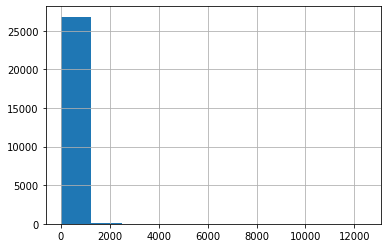

In [17]:
df.cust.value_counts().hist()

In [18]:
#구매 횟수 관련해, 평균인 162회 이상 구매자를 구매 횟수가 많은 것으로 판단
df.cust.value_counts().describe()

count    26916.000000
mean       162.419899
std        219.318656
min          1.000000
25%         30.000000
50%         88.000000
75%        214.000000
max      12448.000000
Name: cust, dtype: float64

In [19]:
#구매 금액은 75%가 만원 이하지만, 저렴한 물품 거래가 빈번해 나온 결과인듯함
df.buy_am.describe()

count    4.371694e+06
mean     2.325773e+04
std      2.300716e+05
min      1.000000e+00
25%      2.000000e+03
50%      4.000000e+03
75%      9.300000e+03
max      6.400000e+07
Name: buy_am, dtype: float64

royal1~3 기준을 적용하기 위해 고객 데이터 프레임 생성

In [20]:
cust=df.cust.unique()
cust=pd.DataFrame(cust,columns=['cust'])

In [21]:
cust[:3]

,cust
0,M430112881
1,M646853852
2,M669384418


In [22]:
from collections import defaultdict
c_info=defaultdict()
for c in cust.cust:
  c_info[c]=[0,0]

In [23]:
for i in range(len(df)):
  c_info[df.iloc[i].cust][0]+=df.iloc[i].buy_am
  c_info[df.iloc[i].cust][1]+=1
  if i%500000==0:                     #진행도 확인용 (총 30분 소요)
    print(round(i/len(df),2)*100)

0.0
11.0
23.0
34.0
46.0
56.99999999999999
69.0
80.0
91.0


In [24]:
m_cost=[]
m_buys=[]
for c in cust.cust:
  m_buys.append(c_info[c][1])
  m_cost.append(round(c_info[c][0]/c_info[c][1],2))

In [25]:
cust['m_cost']=m_cost
cust['m_buys']=m_buys

In [27]:
cust.head()

,cust,m_cost,m_buys
0,M430112881,7175.78,415
1,M646853852,25964.06,353
2,M669384418,13042.08,96
3,M886923095,23809.82,110
4,M707991383,88479.37,366


In [31]:
def royal_cost(x):
  if x>=23257.7:
    return 1
  else:
    return 0

def royal_buys(x):
  if x>=214:
    return 1
  else:
    return 0

In [32]:
cust['royal_cost']=cust.m_cost.apply(royal_cost)
cust['royal_buys']=cust.m_buys.apply(royal_buys)

In [34]:
cust.head()

,cust,m_cost,m_buys,royal_cost,royal_buys
0,M430112881,7175.78,415,0,1
1,M646853852,25964.06,353,1,1
2,M669384418,13042.08,96,0,0
3,M886923095,23809.82,110,1,0
4,M707991383,88479.37,366,1,1


In [35]:
#평균 구매 금액의 평균이 약 3만원인데, 이는 평균 구매금액이 n백만원인 구매자들에 의해 끌어올려진 수치이므로 상위 25%의 금액을 고가품 구매자의 기준으로 정함
cust.m_cost.describe()

count    2.691600e+04
mean     4.611419e+04
std      1.472408e+05
min      1.000000e+01
25%      6.781405e+03
50%      1.381780e+04
75%      3.829094e+04
max      7.677500e+06
Name: m_cost, dtype: float64



---



In [36]:
cust

,cust,m_cost,m_buys,royal_cost,royal_buys
0,M430112881,7175.78,415,0,1
1,M646853852,25964.06,353,1,1
2,M669384418,13042.08,96,0,0
3,M886923095,23809.82,110,1,0
4,M707991383,88479.37,366,1,1
...,...,...,...,...,...
26911,M423644302,43600.00,1,1,0
26912,M316481461,218000.00,1,1,0
26913,M765148247,39000.00,1,1,0
26914,M498069014,100000.00,5,1,0


In [37]:
data1=pd.read_csv('/content/drive/MyDrive/lotte/LPOINT_BIG_COMP_01_DEMO.csv')

In [38]:
cust=pd.merge(cust,data1,on='cust',how='left')

In [39]:
cust

,cust,m_cost,m_buys,royal_cost,royal_buys,ma_fem_dv,ages,zon_hlv
0,M430112881,7175.78,415,0,1,여성,50대,Z17
1,M646853852,25964.06,353,1,1,여성,40대,Z13
2,M669384418,13042.08,96,0,0,여성,50대,Z17
3,M886923095,23809.82,110,1,0,여성,40대,Z17
4,M707991383,88479.37,366,1,1,여성,50대,Z16
...,...,...,...,...,...,...,...,...
26911,M423644302,43600.00,1,1,0,여성,20대,Z02
26912,M316481461,218000.00,1,1,0,여성,30대,Z10
26913,M765148247,39000.00,1,1,0,남성,40대,Z04
26914,M498069014,100000.00,5,1,0,여성,40대,Z14


In [40]:
#성별 인코딩: 여1, 남0을 사용합니다
cust['ma_fem_dv']=cust.ma_fem_dv.apply(lambda x: 1 if x=='여성' else 0)

In [41]:
#연령: 연령대의 대표값으로 나타내기 위해, 연령대+ 5를 사용합니다
cust['ages']=cust.ages.apply(lambda x: int(x[:-1])+5)

In [42]:
cust

,cust,m_cost,m_buys,royal_cost,royal_buys,ma_fem_dv,ages,zon_hlv
0,M430112881,7175.78,415,0,1,1,55,Z17
1,M646853852,25964.06,353,1,1,1,45,Z13
2,M669384418,13042.08,96,0,0,1,55,Z17
3,M886923095,23809.82,110,1,0,1,45,Z17
4,M707991383,88479.37,366,1,1,1,55,Z16
...,...,...,...,...,...,...,...,...
26911,M423644302,43600.00,1,1,0,1,25,Z02
26912,M316481461,218000.00,1,1,0,1,35,Z10
26913,M765148247,39000.00,1,1,0,0,45,Z04
26914,M498069014,100000.00,5,1,0,1,45,Z14


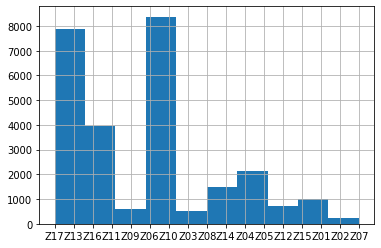

In [43]:
#시각화 결과, Z17과 Z10이 인구가 다수 분포하는 수도권일 것으로 예상되어 해당 지역 거주민을 1, 이외 지역 거주민을 0으로 인코딩 합니다
cust.zon_hlv.hist()

In [44]:
cust['zon_hlv']=cust.zon_hlv.apply(lambda x: 1 if x=='Z17' or x=='Z10' else 0)

In [45]:
cust

,cust,m_cost,m_buys,royal_cost,royal_buys,ma_fem_dv,ages,zon_hlv
0,M430112881,7175.78,415,0,1,1,55,1
1,M646853852,25964.06,353,1,1,1,45,0
2,M669384418,13042.08,96,0,0,1,55,1
3,M886923095,23809.82,110,1,0,1,45,1
4,M707991383,88479.37,366,1,1,1,55,0
...,...,...,...,...,...,...,...,...
26911,M423644302,43600.00,1,1,0,1,25,0
26912,M316481461,218000.00,1,1,0,1,35,1
26913,M765148247,39000.00,1,1,0,0,45,0
26914,M498069014,100000.00,5,1,0,1,45,0




---
고객 데이터 전처리가 완료됐습니다



#구매 데이터 전처리

각 거래 데이터(행) 별로, 

거래물품이 속한 중분류의 상대도수, 대분류의 상대도수, 대분류 내 중분류 상대도수 변수와

월 변수, 평일/주말 변수, 시간대의 분산 변수를 추가할 예정입니다

In [46]:
dl=df.l_pd.value_counts()
lsum=sum(df.l_pd.value_counts())

In [47]:
dl['L0008'] #dl은 각 대분류 상품명의 등장 횟수입니다

438483

In [48]:
l_p=[]
for p in df.l_pd:
  l_p.append(round(dl[p]/lsum,3))
l_p[:3]

[0.016, 0.014, 0.016]

In [49]:
df['l_p']=l_p

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


중분류 상대도수

In [50]:
dm=df.m_pd.value_counts()
msum=sum(df.m_pd.value_counts())

In [51]:
m_p=[]
for p in df.m_pd:
  m_p.append(round(dm[p]/msum,3))

In [52]:
df['m_p']=m_p

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


대분류 내 중분류 상대도수 

In [53]:
l_m_p=[]
for x,y in zip(df.l_pd,df.m_pd):
  l_m_p.append(round(dm[y]/dl[x],3))

In [54]:
#대분류, 중분류, 대분류내 중분류 상대도수 
for x,y,z in zip(l_p[:10],m_p[:10],l_m_p[:10]):
  print(x,y,z)

0.016 0.005 0.305
0.014 0.002 0.147
0.016 0.005 0.305
0.016 0.005 0.305
0.016 0.005 0.305
0.038 0.029 0.766
0.009 0.001 0.122
0.001 0.0 0.201
0.017 0.004 0.264
0.017 0.007 0.424


In [55]:
df['l_m_p']=l_m_p

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [56]:
df

,cust,rct_no,chnl_dv,cop_c,br_c,pd_c,de_dt,de_hr,buy_am,buy_ct,pd_nm,clac_hlv_nm,clac_mcls_nm,l_pd,m_pd,l_p,m_p,l_m_p
0,M430112881,A01000001113,1,A01,A010039,PD0290,20210101,10,15000.0,1,남성티셔츠,남성의류,남성의류상의,L0013,M0058,0.016,0.005,0.305
1,M646853852,A01000002265,1,A01,A010025,PD1369,20210101,10,79700.0,1,기타주방일회용품,주방잡화,주방일회용품,L0048,M0298,0.014,0.002,0.147
2,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,19000.0,1,남성티셔츠,남성의류,남성의류상의,L0013,M0058,0.016,0.005,0.305
3,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,19000.0,1,남성티셔츠,남성의류,남성의류상의,L0013,M0058,0.016,0.005,0.305
4,M430112881,A01000004946,1,A01,A010039,PD0290,20210101,10,19000.0,1,남성티셔츠,남성의류,남성의류상의,L0013,M0058,0.016,0.005,0.305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4381738,M533286446,E06052119978,2,A06,NaN,PD0507,20211231,23,50000.0,1,백화점/마트모바일상품권,상품권,모바일상품권,L0022,M0103,0.003,0.003,0.948
4381739,M533286446,E06052119978,2,A06,NaN,PD0507,20211231,23,50000.0,1,백화점/마트모바일상품권,상품권,모바일상품권,L0022,M0103,0.003,0.003,0.948
4381740,M533286446,E06052119978,2,A06,NaN,PD0507,20211231,23,50000.0,1,백화점/마트모바일상품권,상품권,모바일상품권,L0022,M0103,0.003,0.003,0.948
4381741,M533286446,E06052119978,2,A06,NaN,PD0507,20211231,23,50000.0,1,백화점/마트모바일상품권,상품권,모바일상품권,L0022,M0103,0.003,0.003,0.948


공휴일 변수를 추가합니다

In [57]:
#주말과 공휴일 변수. 첫 토요일은 1월 2일입니다
holi=[]
a,b='1','2'
end={'1':31,'2':28,'3':31,'4':30,'5':31,'6':30,'7':31,'8':31,'9':30,'10':31,'11':30,'12':31}

while True:

  if a=='12' and int(b)>end[a] or a=='13':
    break
  holi.append('2021'+str(a).zfill(2)+str(b).zfill(2))

  if int(b)+1>end[a]:
    a=str(int(a)+1)
    b='1'
    holi.append('2021'+str(a).zfill(2)+str(b).zfill(2))
  else:
    b=str(int(b)+1)
    holi.append('2021'+str(a).zfill(2)+str(b).zfill(2))
  
  #다음 토요일의 날짜로 변경
  if int(b)+6>end[a]:
    b=str(int(b)+6-end[a])
    a=str(int(a)+1)
  else:
    b=str(int(b)+6)

In [58]:
holi[-4:] 

['20211218', '20211219', '20211225', '20211226']

In [59]:
#주말이 아닌 공휴일 추가
holiday=['0101','0211','0212','0301','0505','0519','0816','0920','0921','0922','1004','1011']
for h in holiday:
  holi.append('2021'+h)

In [60]:
df['holi']=df.de_dt.apply(lambda x: 1 if str(x) in holi else 0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [61]:
#쉬는 날에 구매가 비교적 많이 발생합니다
df.holi.value_counts()

0    2745647
1    1626047
Name: holi, dtype: int64

월 변수

1부터 12까지 정수 라벨을 만들 경우, 1월과 12월 사이 간극이 과대평가 되는 문제가 발생합니다.

월변수는 기후와 계절성의 유사한 정도를 알기 위함이므로, 봄과 가을의 기후가 비교적 비슷하다는 점에 착안해 1월과 12월, 2월과 11월 같이 합이 13이 되는 월을 같은 라벨로 인코딩 할 것입니다

In [62]:
str(df.iloc[0].de_dt)[-4:-2]

'01'

In [63]:
def month(d):
  m=str(d)[-4:-2]
  if m=='01' or m=='12' or m=='02':
    return 3
  if m=='03' or m=='04' or m=='05':
    return 0
  if m=='06' or m=='07' or m=='08':
    return 1
  if m=='09' or m=='10' or m=='11':
    return 2

In [64]:
df['month']=df.de_dt.apply(month)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [65]:
#잘 나뉘었습니다
df.month.value_counts()

1    1224709
0    1114121
2    1094252
3     938612
Name: month, dtype: int64



---



제휴사

In [66]:
df.cop_c.value_counts()

A02    2374968
A03     905691
A01     700350
A04     306354
A06      76160
A05       8171
Name: cop_c, dtype: int64

In [67]:
#제휴사에 따라 상품 성향이 다른 것 같습니다
df.groupby(['cop_c'])['clac_hlv_nm'].agg(pd.Series.mode)

cop_c
A01    테넌트/음식점
A02         채소
A03         채소
A04         음료
A05        컴퓨터
A06        상품권
Name: clac_hlv_nm, dtype: object

In [68]:
df[df['cop_c']=='A01'].clac_hlv_nm.value_counts()[:5]
#백화점 또는 쇼핑몰로 추측됨

테넌트/음식점    118284
여성의류        61681
남성의류        61618
스포츠패션       55184
패션잡화        41788
Name: clac_hlv_nm, dtype: int64

In [69]:
df[df['cop_c']=='A02'].clac_hlv_nm.value_counts()[:5]
#마트 또는 식료품점

채소      278231
과자      252569
대용식     190880
유제품     177938
냉장식품    167319
Name: clac_hlv_nm, dtype: int64

In [70]:
df[df['cop_c']=='A03'].clac_hlv_nm.value_counts()[:5]
#마트 또는 식료품점으로 추측

채소      131233
과자      102733
대용식      77184
유제품      76025
냉장식품     61153
Name: clac_hlv_nm, dtype: int64

In [71]:
df[df['cop_c']=='A04'].clac_hlv_nm.value_counts()[:5]
#편의점으로 추측

음료      59704
과자      44306
담배      36717
조리식품    24990
주류      22267
Name: clac_hlv_nm, dtype: int64

In [72]:
df[df['cop_c']=='A05'].clac_hlv_nm.value_counts()[:5]
#가전제품 매장으로 예상

컴퓨터        2380
생활/주방가전    1895
모바일        1407
계절가전        749
냉장/세탁가전     398
Name: clac_hlv_nm, dtype: int64

In [73]:
df[df['cop_c']=='A06'].clac_hlv_nm.value_counts()[:5]
#아울렛 또는 백화점 같습니다

상품권         12088
여성의류         5053
패션잡화         4611
화장품/뷰티케어     3391
유아동의류        3030
Name: clac_hlv_nm, dtype: int64

A01, A06이 유사하며 A02, A03이 유사합니다.

변수의 설명력을 유지하기 위해 정수 라벨링을 사용하지 않습니다

네가지 그룹에 대해 원 핫 인코딩을 적용합니다.

In [74]:
def A1(x): #쇼핑몰, 백화점
  if x=='A01' or x=='A06':
    return 1
  else:
    return 0

def A2(x): #식료품점, 대형마트
  if x=='A02' or x=='A03':
    return 1
  else:
    return 0

def A3(x): #편의점
  if x=='A04':
    return 1
  else:
    return 0

def A4(x): #가전제품 매장
  if x=='A05':
    return 1
  else:
    return 0

In [75]:
df['A1']=df.cop_c.apply(A1)
df['A2']=df.cop_c.apply(A2)
df['A3']=df.cop_c.apply(A3)
df['A4']=df.cop_c.apply(A4)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [76]:
df

,cust,rct_no,chnl_dv,cop_c,br_c,pd_c,de_dt,de_hr,buy_am,buy_ct,...,m_pd,l_p,m_p,l_m_p,holi,month,A1,A2,A3,A4
0,M430112881,A01000001113,1,A01,A010039,PD0290,20210101,10,15000.0,1,...,M0058,0.016,0.005,0.305,1,0,1,0,0,0
1,M646853852,A01000002265,1,A01,A010025,PD1369,20210101,10,79700.0,1,...,M0298,0.014,0.002,0.147,1,0,1,0,0,0
2,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,19000.0,1,...,M0058,0.016,0.005,0.305,1,0,1,0,0,0
3,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,19000.0,1,...,M0058,0.016,0.005,0.305,1,0,1,0,0,0
4,M430112881,A01000004946,1,A01,A010039,PD0290,20210101,10,19000.0,1,...,M0058,0.016,0.005,0.305,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4381738,M533286446,E06052119978,2,A06,NaN,PD0507,20211231,23,50000.0,1,...,M0103,0.003,0.003,0.948,0,0,1,0,0,0
4381739,M533286446,E06052119978,2,A06,NaN,PD0507,20211231,23,50000.0,1,...,M0103,0.003,0.003,0.948,0,0,1,0,0,0
4381740,M533286446,E06052119978,2,A06,NaN,PD0507,20211231,23,50000.0,1,...,M0103,0.003,0.003,0.948,0,0,1,0,0,0
4381741,M533286446,E06052119978,2,A06,NaN,PD0507,20211231,23,50000.0,1,...,M0103,0.003,0.003,0.948,0,0,1,0,0,0


In [77]:
cust.to_csv('cust.csv')

In [78]:
#한번 저장
df.to_csv('data2_pre.csv')

군집분석을 위한 메인 데이터가 준비되었습니다.

분류용 데이터를 만들기 위해 다시 가공이 필요합니다

In [79]:
df=pd.merge(df,cust, on='cust',how='left')

In [80]:
df

,cust,rct_no,chnl_dv,cop_c,br_c,pd_c,de_dt,de_hr,buy_am,buy_ct,...,A2,A3,A4,m_cost,m_buys,royal_cost,royal_buys,ma_fem_dv,ages,zon_hlv
0,M430112881,A01000001113,1,A01,A010039,PD0290,20210101,10,15000.0,1,...,0,0,0,7175.78,415,0,1,1,55,1
1,M646853852,A01000002265,1,A01,A010025,PD1369,20210101,10,79700.0,1,...,0,0,0,25964.06,353,1,1,1,45,0
2,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,19000.0,1,...,0,0,0,7175.78,415,0,1,1,55,1
3,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,19000.0,1,...,0,0,0,7175.78,415,0,1,1,55,1
4,M430112881,A01000004946,1,A01,A010039,PD0290,20210101,10,19000.0,1,...,0,0,0,7175.78,415,0,1,1,55,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4371689,M533286446,E06052119978,2,A06,NaN,PD0507,20211231,23,50000.0,1,...,0,0,0,25081.43,260,1,1,0,45,1
4371690,M533286446,E06052119978,2,A06,NaN,PD0507,20211231,23,50000.0,1,...,0,0,0,25081.43,260,1,1,0,45,1
4371691,M533286446,E06052119978,2,A06,NaN,PD0507,20211231,23,50000.0,1,...,0,0,0,25081.43,260,1,1,0,45,1
4371692,M533286446,E06052119978,2,A06,NaN,PD0507,20211231,23,50000.0,1,...,0,0,0,25081.43,260,1,1,0,45,1


In [81]:
df.columns

Index(['cust', 'rct_no', 'chnl_dv', 'cop_c', 'br_c', 'pd_c', 'de_dt', 'de_hr',
       'buy_am', 'buy_ct', 'pd_nm', 'clac_hlv_nm', 'clac_mcls_nm', 'l_pd',
       'm_pd', 'l_p', 'm_p', 'l_m_p', 'holi', 'month', 'A1', 'A2', 'A3', 'A4',
       'm_cost', 'm_buys', 'royal_cost', 'royal_buys', 'ma_fem_dv', 'ages',
       'zon_hlv'],
      dtype='object')

In [82]:
data=pd.DataFrame(df.clac_mcls_nm.unique(), columns=['mcls_uniq'])

In [83]:
#관측 30회 미만인 중분류는 군집분석에 포함을 안할 수도 있습니다만, 일단 포함하겠습니다
df.m_pd.value_counts()[-20:].keys()

Index(['M0074', 'M0097', 'M0045', 'M0098', 'M0139', 'M0130', 'M0113', 'M0061',
       'M0187', 'M0046', 'M0271', 'M0328', 'M0164', 'M0225', 'M0219', 'M0231',
       'M0018', 'M0148', 'M0188', 'M0122'],
      dtype='object')

In [84]:
df.columns

Index(['cust', 'rct_no', 'chnl_dv', 'cop_c', 'br_c', 'pd_c', 'de_dt', 'de_hr',
       'buy_am', 'buy_ct', 'pd_nm', 'clac_hlv_nm', 'clac_mcls_nm', 'l_pd',
       'm_pd', 'l_p', 'm_p', 'l_m_p', 'holi', 'month', 'A1', 'A2', 'A3', 'A4',
       'm_cost', 'm_buys', 'royal_cost', 'royal_buys', 'ma_fem_dv', 'ages',
       'zon_hlv'],
      dtype='object')

중분류 구매 이력이 있는 고객의 평균 거래금액의 평균 (고객 로열성) / 평균 거래횟수

In [85]:
buys=[]
cost=[]

for p in data.mcls_uniq:
  buys.append(df[df['clac_mcls_nm']==p].m_buys.mean().round(3))
  cost.append(df[df['clac_mcls_nm']==p].m_cost.mean().round(3))

In [86]:
data['buys']=buys
data['cost']=cost

성별, 연령

In [87]:
sex=[]
age=[]

for p in data.mcls_uniq:
  sex.append(df[df['clac_mcls_nm']==p].ma_fem_dv.mean().round(3))
  age.append(df[df['clac_mcls_nm']==p].ages.mean().round(3))

In [88]:
data['sex']=sex
data['age']=age

중분류, 대분류, 대분류 내 중분류의 상대도수

In [89]:
p_l=[]
p_m=[]
p_lm=[]

#중분류의 경우 left join해도 되지만, 아래와 같은 코드를 사용해도 결과가 동일하므로
#코드를 통일합니다

for p in data.mcls_uniq:
  p_l.append(df[df['clac_mcls_nm']==p].l_p.mean().round(3))
  p_m.append(df[df['clac_mcls_nm']==p].m_p.mean().round(3))
  p_lm.append(df[df['clac_mcls_nm']==p].l_m_p.mean().round(3))

In [90]:
data['p_l']=p_l
data['p_m']=p_l
data['p_lm']=p_lm

휴일, 계절성, 수도권성

In [91]:
wk=[] #휴일
mth=[] #계절성
cpt=[] #수도권

for p in data.mcls_uniq:
  wk.append(df[df['clac_mcls_nm']==p].holi.mean().round(3))
  mth.append(df[df['clac_mcls_nm']==p].month.mean().round(3))
  cpt.append(df[df['clac_mcls_nm']==p].zon_hlv.mean().round(3))

In [92]:
data['wk']=wk
data['mth']=mth
data['cpt']=cpt

In [132]:
royal1=[]
royal2=[]

for p in data.mcls_uniq:
  royal1.append(df[df['clac_mcls_nm']==p].royal_buys.mean().round(3))
  royal2.append(df[df['clac_mcls_nm']==p].royal_cost.mean().round(3))

In [134]:
data['royal1']=royal1
data['royal2']=royal2

In [135]:
data.head()

,mcls_uniq,buys,cost,sex,age,p_l,p_m,p_lm,wk,mth,cpt,a1,a2,a3,a4,clust10,clust15,royal1,royal2
0,남성의류상의,249.600,60803.834,0.713,45.128,0.016,0.016,0.305,0.534,1.517,0.521,0.886,0.114,0.000,0.0,6,11,0.418,0.576
1,주방일회용품,458.291,17354.290,0.680,43.837,0.014,0.014,0.147,0.368,1.508,0.444,0.097,0.825,0.078,0.0,1,12,0.683,0.160
2,식당,313.032,43547.437,0.739,44.129,0.038,0.038,0.766,0.413,1.514,0.576,0.683,0.317,0.000,0.0,4,14,0.533,0.404
3,남성양말류,380.641,28163.377,0.720,47.688,0.009,0.009,0.122,0.406,1.435,0.435,0.207,0.779,0.014,0.0,0,4,0.615,0.239
4,기타구기/필드스포츠,297.848,28868.166,0.730,44.445,0.001,0.001,0.201,0.536,1.537,0.479,0.408,0.592,0.000,0.0,0,0,0.487,0.326


제휴사

In [93]:
a1=[] #백화점, 쇼핑몰
a2=[] #식료품점
a3=[] #편의점
a4=[] #가전

for p in data.mcls_uniq:
  a1.append(df[df['clac_mcls_nm']==p].A1.mean().round(3))
  a2.append(df[df['clac_mcls_nm']==p].A2.mean().round(3))
  a3.append(df[df['clac_mcls_nm']==p].A3.mean().round(3))
  a4.append(df[df['clac_mcls_nm']==p].A4.mean().round(3))

In [94]:
data['a1']=a1
data['a2']=a2
data['a3']=a3
data['a4']=a4



---



In [95]:
data.head()

,mcls_uniq,buys,cost,sex,age,p_l,p_m,p_lm,wk,mth,cpt,a1,a2,a3,a4
0,남성의류상의,249.600,60803.834,0.713,45.128,0.016,0.016,0.305,0.534,1.517,0.521,0.886,0.114,0.000,0.0
1,주방일회용품,458.291,17354.290,0.680,43.837,0.014,0.014,0.147,0.368,1.508,0.444,0.097,0.825,0.078,0.0
2,식당,313.032,43547.437,0.739,44.129,0.038,0.038,0.766,0.413,1.514,0.576,0.683,0.317,0.000,0.0
3,남성양말류,380.641,28163.377,0.720,47.688,0.009,0.009,0.122,0.406,1.435,0.435,0.207,0.779,0.014,0.0
4,기타구기/필드스포츠,297.848,28868.166,0.730,44.445,0.001,0.001,0.201,0.536,1.537,0.479,0.408,0.592,0.000,0.0


추가 전처리

In [96]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import seaborn as sns

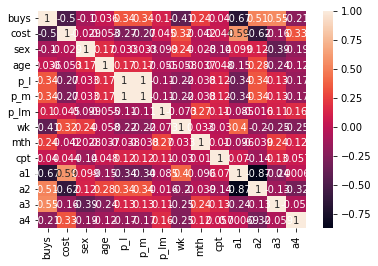

In [97]:
correl=data.corr()
sns.heatmap(correl,annot=True)

In [136]:
data.columns

Index(['mcls_uniq', 'buys', 'cost', 'sex', 'age', 'p_l', 'p_m', 'p_lm', 'wk',
       'mth', 'cpt', 'a1', 'a2', 'a3', 'a4', 'clust10', 'clust15', 'royal1',
       'royal2'],
      dtype='object')

In [199]:
features = ['royal1', 'royal2', 'sex', 'age', 'p_l', 'p_m', 'p_lm', 'a1', 'a2', 'a3', 'a4']
# 사용데이터와 분류 대상을 분리
x = data.loc[:, features].values
y = data.loc[:,['mcls_uniq']].values

#양적 변수 스케일 조정
x1 = MinMaxScaler().fit_transform(x)
x2=StandardScaler().fit_transform(x)

#PCA

In [200]:
from sklearn.decomposition import PCA
pca1 = PCA(n_components=2)
pc1 = pca1.fit_transform(x1)
pcdf1 = pd.DataFrame(data = pc1
             , columns = ['pc1', 'pc2'])

In [201]:
pca2 = PCA(n_components=2)
pc2 = pca2.fit_transform(x2)
pcdf2 = pd.DataFrame(data = pc2
             , columns = ['pc1', 'pc2'])

In [202]:
df1= pd.concat([pcdf1, data[['mcls_uniq']]], axis = 1)
df2= pd.concat([pcdf2, data[['mcls_uniq']]], axis = 1)

In [203]:
pcdf1

,pc1,pc2
0,0.702133,0.162334
1,-0.387186,-0.219824
2,0.272856,0.268495
3,-0.236589,-0.235119
4,0.097659,-0.258392
...,...,...
344,0.926992,0.182830
345,0.777035,0.026357
346,0.822960,0.053132
347,0.858420,0.058313


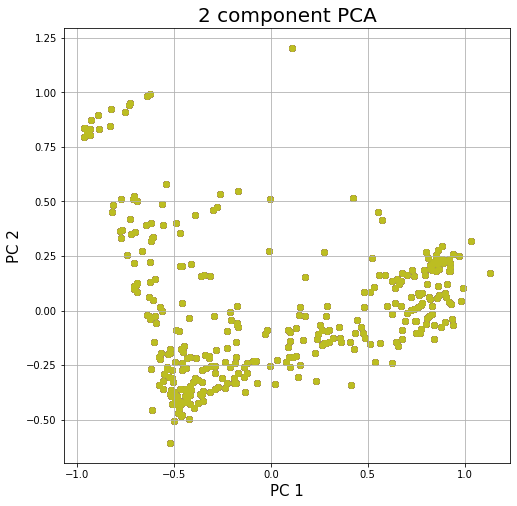

In [204]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC 1', fontsize = 15)
ax.set_ylabel('PC 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

for target in data.mcls_uniq:
    ax.scatter(pcdf1.pc1,pcdf1.pc2)
ax.grid()

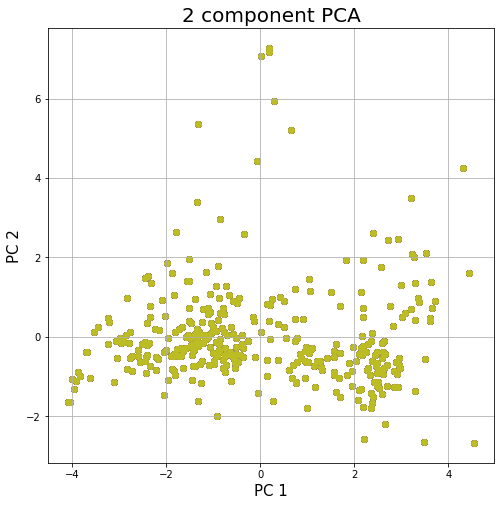

In [205]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC 1', fontsize = 15)
ax.set_ylabel('PC 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

for target in data.mcls_uniq:
    ax.scatter(pcdf2.pc1,pcdf2.pc2)
ax.grid()

In [206]:
print("pc1 총분산: {1}, 분산: {0}".format(pca1.explained_variance_ratio_,round(sum(pca1.explained_variance_ratio_),3)))

pc1 총분산: 0.763, 분산: [0.58443619 0.17895347]


MinMaxScaler를 사용한 2요소 주성분 분석 결과가 훨씬 덜 랜덤한 분포를 보여주는데, 설명하는 총 분산이 70%로 조금 적은듯하여 3요소 주성분 분석을 사용하겠습니다

In [207]:
pca3 = PCA(n_components=3)
pc3 = pca3.fit_transform(x1)
pcdf3 = pd.DataFrame(data = pc3
             , columns = ['pc1', 'pc2','pc3'])

df3= pd.concat([pcdf3, data[['mcls_uniq']]], axis = 1)

In [208]:
print("pc3 총분산: {1}, 분산: {0}".format(pca3.explained_variance_ratio_,round(sum(pca3.explained_variance_ratio_),3)))

pc3 총분산: 0.849, 분산: [0.58443619 0.17895347 0.08547969]


3요소를 사용하면 총 분산 약 80%를 설명합니다

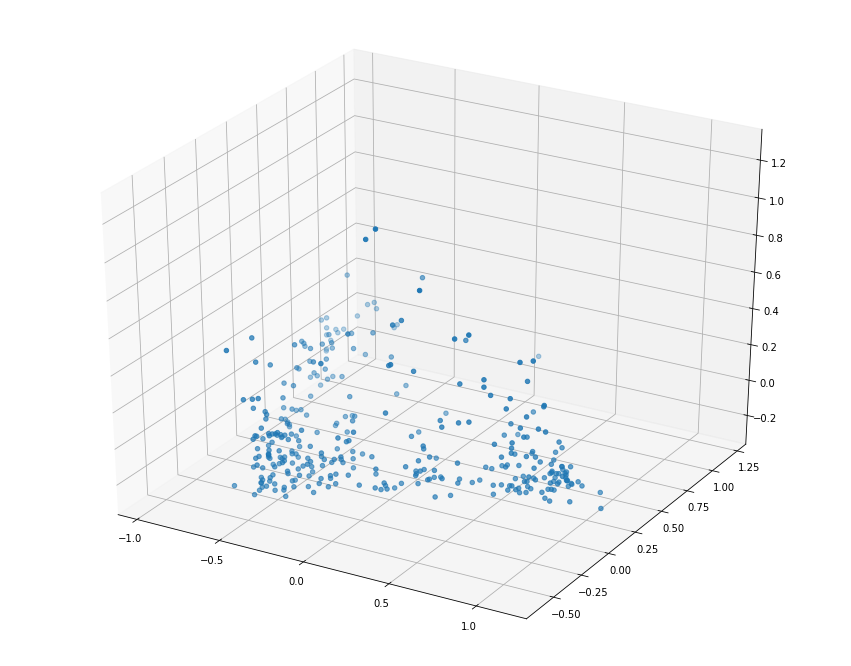

In [209]:
#3차원 시각화

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pcdf3.pc1, pcdf3.pc2, pcdf3.pc3)
fig.set_size_inches(15,12)
plt.show()



---



#클러스터링


In [210]:
from sklearn.cluster import KMeans

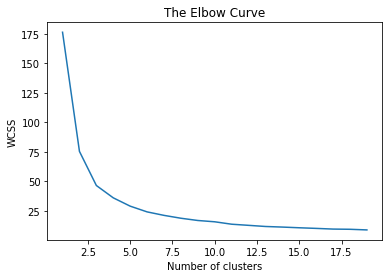

In [211]:
wcss = []
for i in range(1,20):
 kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
 kmeans.fit(pcdf3)
 wcss.append(kmeans.inertia_)
plt.plot(range(1,20),wcss)
plt.title('The Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') ##WCSS stands for total within-cluster sum of square
plt.show()

최소 10개의 군집을 생성하는 것이 좋아보입니다.

In [226]:
kmeans1 = KMeans(n_clusters=10,init='k-means++',max_iter=300,n_init=10,random_state=0)
kmeans1.fit(pcdf3)

KMeans(n_clusters=10, random_state=0)

In [227]:
kmeans2 = KMeans(n_clusters=15,init='k-means++',max_iter=300,n_init=10,random_state=0)
kmeans2.fit(pcdf3)

KMeans(n_clusters=15, random_state=0)

In [228]:
kmeans3 = KMeans(n_clusters=5,init='k-means++',max_iter=300,n_init=10,random_state=0)
kmeans3.fit(pcdf3)

KMeans(n_clusters=5, random_state=0)

In [229]:
data['clust10']=kmeans1.labels_
data['clust15']=kmeans2.labels_
data['clust5']=kmeans3.labels_

In [230]:
data.clust10.value_counts()

8    68
6    53
1    48
2    39
4    35
9    28
5    25
0    24
3    18
7    11
Name: clust10, dtype: int64

In [231]:
data.clust15.value_counts()

10    59
1     42
8     39
0     39
5     32
2     26
4     23
6     19
11    17
7     17
3      9
9      8
13     8
14     7
12     4
Name: clust15, dtype: int64

In [240]:
data.clust5.value_counts()

0    133
2     89
1     60
3     42
4     25
Name: clust5, dtype: int64

In [241]:
for i in range(10):
  print(data[data['clust10']==i].mcls_uniq)

8       기타아웃도어/레저
23           성인침구
24         남성의류세트
28           피트니스
45             골프
60         수영/물놀이
107            TV
108           청소기
109           세탁기
110       이용권/입장권
119    공기청정/가습/제습
128       모바일액세서리
130       컴퓨터/노트북
131         이미용가전
144        냉장/냉동고
152          주방가전
185         모바일기기
262          난방가전
278           오디오
291          임대매출
292        모바일상품권
316      DVD/홈시어터
340           전화기
341           기프트
Name: mcls_uniq, dtype: object
7        커피음료
25        차음료
26          빵
36       레토르트
61       수입과일
63         와인
75        디저트
78       육가공품
80       과채음료
81       국산과일
98      햄/소시지
100     국산소고기
101      요구르트
103       계란류
115        건면
121        생수
126    비식품테넌트
127      유가공품
129     어묵/맛살
133      음료세트
141      탄산음료
149    국산돼지고기
154      용기라면
157        양주
160      포장반찬
166     기능성음료
168    미국산소고기
169       시리얼
173    기타국소고기
174     냉장간편식
176       양념육
184    과일선물세트
186        우유
196       건과일
200      닭고기류
210       가공유
215        소주
228       견과류
229  

In [233]:
for i in range(15):
  print(data[data['clust15']==i].mcls_uniq)

3           남성양말류
11             장갑
13           조리도구
48              떡
53           교육완구
68            홈웨어
69          여성양말류
79       액세서리편의용품
87           원두커피
116          바디케어
118        핸드/풋케어
120          온장조리
124     일반문구/사무용품
137            원예
146          수예소품
147       여아의류아우터
158    카페트/러그/매트류
171    실외놀이/스포츠완구
179          미용소품
183          헤어케어
212          정리용품
219       밀폐/보관용기
233      사무용지/서식지
237        수산선물세트
241       소형디지털가전
243         교육보조재
251        헤어액세서리
254      건해산물선물세트
265         스키/보드
270           웨이트
275     유아스킨/바디케어
290    자동차음향/가전기기
293          건강진액
294       안마/찜질용품
296    여아의류특수목적의류
297      전자/비디오게임
300      시공/DIY가구
308          승용완구
311           자전거
Name: mcls_uniq, dtype: object
5          여성의류아우터
9          남성의류아우터
12     남성등산/아웃도어의류
15       남성일반스포츠의류
21            여성가방
30          남성의류하의
37          여성의류세트
40              보석
41          여성골프의류
46          여성스포츠화
47             여성화
52          남성골프의류
62          유아의류세트
65      유아동일반스포츠의류
6



---



#군집분석 해석용

In [234]:
data.groupby(["clust15"]).mean()

,buys,cost,sex,age,p_l,p_m,p_lm,wk,mth,cpt,a1,a2,a3,a4,clust10,royal1,royal2,clust5
clust15,,,,,,,,,,,,,,,,,,
0,388.562128,28470.178436,0.721128,44.950179,0.009077,0.009077,0.111872,0.402436,1.345949,0.492974,0.239436,0.734077,0.016974,0.009564,2.000000,0.625000,0.252974,0.307692
1,236.433619,97776.489071,0.753667,44.613429,0.011000,0.011000,0.061238,0.479238,1.347262,0.519476,0.980048,0.017762,0.000357,0.001833,6.000000,0.418071,0.708548,2.000000
2,452.281346,17618.052654,0.715923,46.339923,0.040231,0.040231,0.100346,0.367462,1.349308,0.567346,0.081808,0.895346,0.022923,0.000000,2.884615,0.708808,0.144308,0.538462
3,510.098333,48364.497000,0.651000,44.647222,0.007667,0.007667,0.295778,0.287333,1.578667,0.513778,0.333444,0.170889,0.215222,0.280778,3.222222,0.447111,0.448556,3.777778
4,494.329478,15408.173565,0.702087,45.292304,0.063174,0.063174,0.197870,0.352739,1.417217,0.552696,0.056652,0.843130,0.100174,0.000000,1.000000,0.728478,0.121913,1.000000
5,324.610031,46217.033094,0.749313,44.606031,0.005844,0.005844,0.099000,0.421281,1.312188,0.519031,0.532250,0.448844,0.013219,0.005656,4.000000,0.540500,0.405406,3.000000
6,453.079474,17370.385842,0.713105,44.994579,0.006105,0.006105,0.433895,0.390263,1.385316,0.497158,0.058053,0.927632,0.012105,0.002316,5.315789,0.705842,0.144789,0.000000
7,521.194294,16423.804647,0.724294,45.914000,0.098588,0.098588,0.117588,0.356824,1.371529,0.546588,0.063118,0.870412,0.066471,0.000000,3.000000,0.736235,0.129824,1.000000
8,274.979154,64480.737974,0.683359,43.991590,0.007795,0.007795,0.084846,0.452282,1.395923,0.551128,0.836821,0.117026,0.000385,0.045667,7.461538,0.460077,0.531179,2.051282


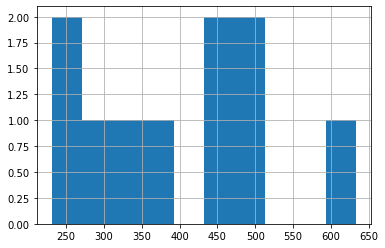

In [235]:
data.groupby(["clust10"]).mean().buys.hist()

In [236]:
data.groupby(["clust10"]).mean().mean(axis=0)

buys         399.929811
cost       45497.921838
sex            0.697006
age           44.660160
p_l            0.022299
p_m            0.022299
p_lm           0.228515
wk             0.394666
mth            1.431715
cpt            0.540580
a1             0.372707
a2             0.495138
a3             0.078427
a4             0.053725
clust15        6.171450
royal1         0.583994
royal2         0.344391
clust5         1.648329
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f003505f910>,
      dtype=object)

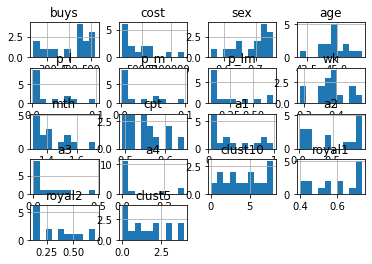

In [237]:
data.groupby(["clust15"]).mean().hist()

In [238]:
data.groupby(["clust15"]).mean()

,buys,cost,sex,age,p_l,p_m,p_lm,wk,mth,cpt,a1,a2,a3,a4,clust10,royal1,royal2,clust5
clust15,,,,,,,,,,,,,,,,,,
0,388.562128,28470.178436,0.721128,44.950179,0.009077,0.009077,0.111872,0.402436,1.345949,0.492974,0.239436,0.734077,0.016974,0.009564,2.000000,0.625000,0.252974,0.307692
1,236.433619,97776.489071,0.753667,44.613429,0.011000,0.011000,0.061238,0.479238,1.347262,0.519476,0.980048,0.017762,0.000357,0.001833,6.000000,0.418071,0.708548,2.000000
2,452.281346,17618.052654,0.715923,46.339923,0.040231,0.040231,0.100346,0.367462,1.349308,0.567346,0.081808,0.895346,0.022923,0.000000,2.884615,0.708808,0.144308,0.538462
3,510.098333,48364.497000,0.651000,44.647222,0.007667,0.007667,0.295778,0.287333,1.578667,0.513778,0.333444,0.170889,0.215222,0.280778,3.222222,0.447111,0.448556,3.777778
4,494.329478,15408.173565,0.702087,45.292304,0.063174,0.063174,0.197870,0.352739,1.417217,0.552696,0.056652,0.843130,0.100174,0.000000,1.000000,0.728478,0.121913,1.000000
5,324.610031,46217.033094,0.749313,44.606031,0.005844,0.005844,0.099000,0.421281,1.312188,0.519031,0.532250,0.448844,0.013219,0.005656,4.000000,0.540500,0.405406,3.000000
6,453.079474,17370.385842,0.713105,44.994579,0.006105,0.006105,0.433895,0.390263,1.385316,0.497158,0.058053,0.927632,0.012105,0.002316,5.315789,0.705842,0.144789,0.000000
7,521.194294,16423.804647,0.724294,45.914000,0.098588,0.098588,0.117588,0.356824,1.371529,0.546588,0.063118,0.870412,0.066471,0.000000,3.000000,0.736235,0.129824,1.000000
8,274.979154,64480.737974,0.683359,43.991590,0.007795,0.007795,0.084846,0.452282,1.395923,0.551128,0.836821,0.117026,0.000385,0.045667,7.461538,0.460077,0.531179,2.051282


In [239]:
data.groupby(["clust15"]).mean().mean(axis=0)

buys         403.669314
cost       44150.330987
sex            0.688332
age           44.780407
p_l            0.026146
p_m            0.026146
p_lm           0.242190
wk             0.384808
mth            1.439094
cpt            0.550754
a1             0.353251
a2             0.500133
a3             0.091132
a4             0.055491
clust10        4.254182
royal1         0.590941
royal2         0.334941
clust5         1.611541
dtype: float64

In [243]:
df

,cust,rct_no,chnl_dv,cop_c,br_c,pd_c,de_dt,de_hr,buy_am,buy_ct,...,A2,A3,A4,m_cost,m_buys,royal_cost,royal_buys,ma_fem_dv,ages,zon_hlv
0,M430112881,A01000001113,1,A01,A010039,PD0290,20210101,10,15000.0,1,...,0,0,0,7175.78,415,0,1,1,55,1
1,M646853852,A01000002265,1,A01,A010025,PD1369,20210101,10,79700.0,1,...,0,0,0,25964.06,353,1,1,1,45,0
2,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,19000.0,1,...,0,0,0,7175.78,415,0,1,1,55,1
3,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,19000.0,1,...,0,0,0,7175.78,415,0,1,1,55,1
4,M430112881,A01000004946,1,A01,A010039,PD0290,20210101,10,19000.0,1,...,0,0,0,7175.78,415,0,1,1,55,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4371689,M533286446,E06052119978,2,A06,NaN,PD0507,20211231,23,50000.0,1,...,0,0,0,25081.43,260,1,1,0,45,1
4371690,M533286446,E06052119978,2,A06,NaN,PD0507,20211231,23,50000.0,1,...,0,0,0,25081.43,260,1,1,0,45,1
4371691,M533286446,E06052119978,2,A06,NaN,PD0507,20211231,23,50000.0,1,...,0,0,0,25081.43,260,1,1,0,45,1
4371692,M533286446,E06052119978,2,A06,NaN,PD0507,20211231,23,50000.0,1,...,0,0,0,25081.43,260,1,1,0,45,1


In [244]:
df.columns

Index(['cust', 'rct_no', 'chnl_dv', 'cop_c', 'br_c', 'pd_c', 'de_dt', 'de_hr',
       'buy_am', 'buy_ct', 'pd_nm', 'clac_hlv_nm', 'clac_mcls_nm', 'l_pd',
       'm_pd', 'l_p', 'm_p', 'l_m_p', 'holi', 'month', 'A1', 'A2', 'A3', 'A4',
       'm_cost', 'm_buys', 'royal_cost', 'royal_buys', 'ma_fem_dv', 'ages',
       'zon_hlv'],
      dtype='object')

In [245]:
data

,mcls_uniq,buys,cost,sex,age,p_l,p_m,p_lm,wk,mth,cpt,a1,a2,a3,a4,clust10,clust15,royal1,royal2,clust5
0,남성의류상의,249.600,60803.834,0.713,45.128,0.016,0.016,0.305,0.534,1.517,0.521,0.886,0.114,0.000,0.0,9,8,0.418,0.576,2
1,주방일회용품,458.291,17354.290,0.680,43.837,0.014,0.014,0.147,0.368,1.508,0.444,0.097,0.825,0.078,0.0,8,10,0.683,0.160,0
2,식당,313.032,43547.437,0.739,44.129,0.038,0.038,0.766,0.413,1.514,0.576,0.683,0.317,0.000,0.0,7,3,0.533,0.404,4
3,남성양말류,380.641,28163.377,0.720,47.688,0.009,0.009,0.122,0.406,1.435,0.435,0.207,0.779,0.014,0.0,2,0,0.615,0.239,0
4,기타구기/필드스포츠,297.848,28868.166,0.730,44.445,0.001,0.001,0.201,0.536,1.537,0.479,0.408,0.592,0.000,0.0,4,5,0.487,0.326,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,소모품,129.500,35777.690,0.500,45.000,0.010,0.010,0.000,0.000,0.500,0.500,1.000,0.000,0.000,0.0,6,1,0.000,0.500,2
345,격투기,363.667,112465.367,0.333,41.667,0.001,0.001,0.001,0.667,0.667,1.000,1.000,0.000,0.000,0.0,6,8,0.667,0.333,2
346,오토바이,243.500,22953.957,0.000,50.000,0.002,0.002,0.001,0.167,1.167,0.500,1.000,0.000,0.000,0.0,6,8,0.333,0.333,2
347,임산부케어용품,214.571,20054.963,0.714,40.714,0.002,0.002,0.001,0.286,0.857,0.571,1.000,0.000,0.000,0.0,6,1,0.429,0.429,2


In [249]:
for m in df.m_pd.value_counts()[-20:].keys():
  print(df[df['m_pd']==m].iloc[0,:].clac_mcls_nm)

남아의류전신
렌탈서비스
기타지갑
렌탈수수료
생활요금상품판매/충전
사무기기
배구
남성의류전신
야외용가구
기프트
임산부케어용품
특판
스케이트/썰매
오토바이
여행/레저
용기보증금
격투기
소모품
양곡선물세트
보험
